# Project Title: Credit Score Prediction

-------------------------------------------------------------------------------------------------------------

### Project Overview
Credit scoring is an essential process used by lenders to evaluate the creditworthiness of individuals and businesses. This assessment aids in deciding whether to approve a loan application and determining the appropriate interest rate to charge. Creditworthiness is typically based on several factors, including the applicant's credit history, income, employment history, and debt-to-income ratio.

---------------------------------------------------------------------------------------------------------------

### Objective
The objective of a credit score prediction project is to develop a machine learning model that can accurately predict credit scores. This model can then be used by lenders to make more informed decisions about loan applications.

---------------------------------------------------------------------------------------------------------------

### Data Description

The dataset contains the following attributes:

- Age: The age of the customer
- Occupation: The customer’s occupation
- Annual_Income: The customer’s annual income
- Monthly_Inhand_Salary: The customer’s base monthly salary
- Num_Bank_Accounts: The number of bank accounts held by the customer
- Num_Credit_Card: The number of credit cards held by the customer
- Interest_Rate: The interest rate applied to the customer’s credit cards
- Num_of_Loan: The total number of loans taken by the customer
- Type_of_Loan: The types of loans taken by the customer
- Delay_from_due_date: The average number of days by which payments are delayed
- Num_of_Delayed_Payment: The number of times payments have been delayed
- Changed_Credit_Limit: The percentage change in the credit card limit
- Credit_Mix: Classification of the customer’s credit mix (e.g., credit cards, loans, mortgages)
- Outstanding_Debt: The remaining debt to be paid by the customer
- Credit_Utilization_Ratio: The utilization ratio of the customer’s credit card
- Credit_History_Age: The duration of the customer’s credit history
- Payment_of_Min_Amount: Indicates if the customer has only paid the minimum amount
- Total_EMI_per_month: The customer’s total monthly EMI payments
- Amount_invested_monthly: The customer’s monthly investments
- Payment_Behaviour: The customer's payment behavior
- Monthly_Balance: The customer's monthly balance amount
- Credit_Score: The customer’s credit score category (target variable: Poor, Standard, Good)


------------------------------------------------------------------------------------------------------------


In [227]:
# import the packages

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [228]:
# read the file

df = pd.read_csv("./data/dataset.csv",low_memory=False)

df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [229]:
df.shape

(100000, 28)

### Exploratory Data Analysis (EDA)


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [231]:
df.drop_duplicates()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [232]:
# sns.pairplot(df)

### Credit Score


In [233]:
df['Credit_Score']

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object

#### Map the target variable using the defined mapping


In [234]:
target_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
df['Credit_Score'] = df['Credit_Score'].map(target_mapping)

In [235]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,2
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,2
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,2
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,1
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,1
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,2


---------------------------------
Poor=0, Standard=1, Good=2 

In [236]:
df.drop(["Name"],axis=1,inplace=True)

In [237]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [238]:
# df.corr(numeric_only=True).T

-----------------------------------------------------------------------------------------------------

Dropping the below columns because of low correlation ratio with the dependent variable: 
- ID and Customer_ID
- Month
- SSN
- Num_Bank_Accounts and Num_Credit_Card
- Interest_Rate
- Num_of_Loan and Type_of_Loan
- Changed_Credit_Limit
- Amount_invested_monthly

In [239]:
df_new = df.drop(['ID','Month','SSN','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Amount_invested_monthly'], axis=1).copy()

In [240]:
df_new

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23,Scientist,19114.12,1824.843333,3,7,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,2
1,CUS_0xd40,23,Scientist,19114.12,NaN,-1,NaN,4.0,Good,809.98,31.944960,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,2
2,CUS_0xd40,-500,Scientist,19114.12,NaN,3,7,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,2
3,CUS_0xd40,23,Scientist,19114.12,NaN,5,4,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,2
4,CUS_0xd40,23,Scientist,19114.12,1824.843333,6,NaN,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,25,Mechanic,39628.99,3359.415833,23,7,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.86622816574095,0
99996,CUS_0x942c,25,Mechanic,39628.99,3359.415833,18,7,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.651610435322,0
99997,CUS_0x942c,25,Mechanic,39628.99,3359.415833,27,6,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.8090832742814,0
99998,CUS_0x942c,25,Mechanic,39628.99,3359.415833,20,NaN,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.1649785257098,1


------------------------------------------------------------------------------------------------------------
### Age

In [241]:
df_new['Age']

0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 100000, dtype: object

In [242]:
df_new['Age']= df_new['Age'].astype(str).str.replace(r"\D","",regex=True).astype(int)

#1.  astype(str): Converts each entry to a string.
#2.  .str.replace(r'\D', '', regex=True): Removes any non-digit
# characters using a regular expression (\D matches any non-digit).
#3. .astype(int): Converts the cleaned values to integers.



In [243]:
df_new['Age']

0         23
1         23
2        500
3         23
4         23
        ... 
99995     25
99996     25
99997     25
99998     25
99999     25
Name: Age, Length: 100000, dtype: int64

In [244]:
for i in range(0,len(df_new['Age'])):
    if df_new['Age'][i] < 10 or df_new['Age'][i]>90:
        df_new['Age'][i] = np.nan
    

/tmp/ipykernel_309554/1965986786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Age'][i] = np.nan


In [245]:
df_new['Age']

0        23.0
1        23.0
2         NaN
3        23.0
4        23.0
         ... 
99995    25.0
99996    25.0
99997    25.0
99998    25.0
99999    25.0
Name: Age, Length: 100000, dtype: float64

-------------------------------------------------------------------------------------------------------------
### Occupation

In [246]:
df_new['Occupation']

0        Scientist
1        Scientist
2        Scientist
3        Scientist
4        Scientist
           ...    
99995     Mechanic
99996     Mechanic
99997     Mechanic
99998     Mechanic
99999     Mechanic
Name: Occupation, Length: 100000, dtype: object

In [247]:
df_new['Occupation'].isna().sum()

0

In [248]:
df_new['Occupation'].replace("_______",np.nan,inplace=True)


ffill() (forward fill) propagates missing or NaN values using the previous valid value in a column or row, while DataFrame. bfill() (backward fill) propagates them using the next valid value

In [249]:
df_new['Occupation'] =df_new.groupby("Customer_ID")['Occupation'].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

/tmp/ipykernel_309554/1755030891.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_new['Occupation'] =df_new.groupby("Customer_ID")['Occupation'].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))


In [250]:
df_new.isna().sum()

Customer_ID                     0
Age                          2781
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

--------------------------------------------------------------------------------------------------------------
### Annual_Income

In [251]:
df_new['Annual_Income'].value_counts()

Annual_Income
36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: count, Length: 18940, dtype: int64

In [252]:
underscore_entries = df_new[df_new['Annual_Income'].astype(str).str.contains("_")]
underscore_entries['Annual_Income'].count()

6980

In [253]:
df_new["Annual_Income"] = df_new["Annual_Income"].str.replace("_" , "").astype("float")


In [254]:
df_new['Annual_Income'].value_counts()

Annual_Income
17816.75       16
22434.16       16
40341.16       16
17273.83       16
109945.32      16
               ..
17079092.00     1
1910572.00      1
20179076.00     1
7980216.00      1
8299495.00      1
Name: count, Length: 13487, dtype: int64

---------------------------------------------------------------------------------------------------------------
### Monthly_Inhand_Salary

In [255]:
df_new['Monthly_Inhand_Salary'].head(15)

0     1824.843333
1             NaN
2             NaN
3             NaN
4     1824.843333
5             NaN
6     1824.843333
7     1824.843333
8     3037.986667
9     3037.986667
10    3037.986667
11            NaN
12    3037.986667
13    3037.986667
14            NaN
Name: Monthly_Inhand_Salary, dtype: float64

In [256]:
df_new['Monthly_Inhand_Salary'].isna().sum()

15002

In [257]:
df_new['Monthly_Inhand_Salary'] = df_new['Monthly_Inhand_Salary'].fillna(df_new['Annual_Income']/12)

In [258]:
df_new['Monthly_Inhand_Salary'].isnull().sum()

0

In [259]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       97219 non-null   float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Delay_from_due_date       100000 non-null  int64  
 6   Num_of_Delayed_Payment    92998 non-null   object 
 7   Num_Credit_Inquiries      98035 non-null   float64
 8   Credit_Mix                100000 non-null  object 
 9   Outstanding_Debt          100000 non-null  object 
 10  Credit_Utilization_Ratio  100000 non-null  float64
 11  Credit_History_Age        90970 non-null   object 
 12  Payment_of_Min_Amount     100000 non-null  object 
 13  Total_EMI_per_month       100000 non-null  fl

---------------------------------------------------------------------------------------------------------------
### Delay_from_due_date

In [260]:
df_new['Delay_from_due_date'].value_counts().sort_index()

Delay_from_due_date
-5      33
-4      62
-3     118
-2     168
-1     210
      ... 
 63     69
 64     64
 65     56
 66     32
 67     22
Name: count, Length: 73, dtype: int64

In [261]:
df_new['Delay_from_due_date'].isna().sum()

0

---------------------------------------------------------------------------------------------------------------
### Num_of_Delayed_Payment

In [262]:
df_new['Num_of_Delayed_Payment'].isna().sum()

7002

In [263]:
df_new["Num_of_Delayed_Payment"] = df_new["Num_of_Delayed_Payment"].apply(lambda x: str(x).split('_')[0] if '_' in str(x) else x)


In [264]:
df_new["Num_of_Delayed_Payment"] = df_new["Num_of_Delayed_Payment"].astype("float64")


In [265]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       97219 non-null   float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Delay_from_due_date       100000 non-null  int64  
 6   Num_of_Delayed_Payment    92998 non-null   float64
 7   Num_Credit_Inquiries      98035 non-null   float64
 8   Credit_Mix                100000 non-null  object 
 9   Outstanding_Debt          100000 non-null  object 
 10  Credit_Utilization_Ratio  100000 non-null  float64
 11  Credit_History_Age        90970 non-null   object 
 12  Payment_of_Min_Amount     100000 non-null  object 
 13  Total_EMI_per_month       100000 non-null  fl

---------------------------------------------------------------------------------------------------------------
### Num_Credit_Inquiries

In [266]:
df_new['Num_Credit_Inquiries'].isna().sum()

1965

In [267]:
num_credit_inq_mode = df_new['Num_Credit_Inquiries'].value_counts().mode()[0]
df_new['Num_Credit_Inquiries'].fillna(num_credit_inq_mode,inplace=True)

/tmp/ipykernel_309554/2428342986.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['Num_Credit_Inquiries'].fillna(num_credit_inq_mode,inplace=True)


In [268]:
df_new['Num_Credit_Inquiries'].isna().sum()

0

In [269]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       97219 non-null   float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Delay_from_due_date       100000 non-null  int64  
 6   Num_of_Delayed_Payment    92998 non-null   float64
 7   Num_Credit_Inquiries      100000 non-null  float64
 8   Credit_Mix                100000 non-null  object 
 9   Outstanding_Debt          100000 non-null  object 
 10  Credit_Utilization_Ratio  100000 non-null  float64
 11  Credit_History_Age        90970 non-null   object 
 12  Payment_of_Min_Amount     100000 non-null  object 
 13  Total_EMI_per_month       100000 non-null  fl

-------------------------------------------------------------------------------------------------------------
### Credit_Mix

In [270]:
df_new['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [271]:
df_new['Credit_Mix'] = df_new['Credit_Mix'].replace("_",np.nan)

In [272]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
credit_encoder = LabelEncoder()

df_new['Credit_Mix'] = credit_encoder.fit_transform(df['Credit_Mix'])

In [273]:
df_new['Credit_Mix'].value_counts()

Credit_Mix
2    36479
1    24337
3    20195
0    18989
Name: count, dtype: int64

In [274]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       97219 non-null   float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Delay_from_due_date       100000 non-null  int64  
 6   Num_of_Delayed_Payment    92998 non-null   float64
 7   Num_Credit_Inquiries      100000 non-null  float64
 8   Credit_Mix                100000 non-null  int64  
 9   Outstanding_Debt          100000 non-null  object 
 10  Credit_Utilization_Ratio  100000 non-null  float64
 11  Credit_History_Age        90970 non-null   object 
 12  Payment_of_Min_Amount     100000 non-null  object 
 13  Total_EMI_per_month       100000 non-null  fl

---------------------------------------------------------------------------------------------------------------
### Outstanding_Debt

In [275]:
df_new["Outstanding_Debt"].value_counts()


Outstanding_Debt
1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: count, Length: 13178, dtype: int64

In [276]:
df_new['Outstanding_Debt'].isna().sum()

0

 The filter_col function cleans up a string by removing unwanted characters and extracting specific parts based on conditions:

1. Checks for Hyphens (-): If value contains a hyphen (-), it returns the part after the hyphen by splitting at '-'.
2. Checks for Underscores (_): If there is no hyphen but an underscore (_) is present, it returns the part before the underscore by splitting at '_'.
3. Returns the Original Value: If neither '-' nor '_' is found, it returns value as is.

In [277]:
def filter_column(value):
    if '-' in value:
        return value.split('-')[1]
    return value.split('_')[0] if '_' in value else value


In [278]:
df_new["Outstanding_Debt"] = df_new["Outstanding_Debt"].apply(lambda x: float(filter_column(x)))

In [279]:
df_new['Outstanding_Debt'].value_counts()

Outstanding_Debt
1109.03    24
1151.70    24
1360.45    24
460.46     24
1058.13    16
           ..
4230.04     8
641.99      8
98.61       8
2614.48     8
502.38      8
Name: count, Length: 12203, dtype: int64

In [280]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       97219 non-null   float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Delay_from_due_date       100000 non-null  int64  
 6   Num_of_Delayed_Payment    92998 non-null   float64
 7   Num_Credit_Inquiries      100000 non-null  float64
 8   Credit_Mix                100000 non-null  int64  
 9   Outstanding_Debt          100000 non-null  float64
 10  Credit_Utilization_Ratio  100000 non-null  float64
 11  Credit_History_Age        90970 non-null   object 
 12  Payment_of_Min_Amount     100000 non-null  object 
 13  Total_EMI_per_month       100000 non-null  fl

-------------------------------------------------------------------------------------------------------------
### Credit_Utilization_Ratio

In [281]:
df_new['Credit_Utilization_Ratio'].value_counts()

Credit_Utilization_Ratio
26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: count, Length: 100000, dtype: int64

In [282]:
df_new['Credit_Utilization_Ratio'].isna().sum()

0

In [283]:
df_new['Credit_Utilization_Ratio'] = df_new['Credit_Utilization_Ratio'].round(2)

--------------------------------------------------------------------------------------------------------------
### Credit_History_Age

In [284]:
df_new.head(10)

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,7.0,4.0,3,809.98,26.82,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,2
1,CUS_0xd40,23.0,Scientist,19114.12,1592.843333,-1,NaN,4.0,1,809.98,31.94,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,2
2,CUS_0xd40,NaN,Scientist,19114.12,1592.843333,3,7.0,4.0,1,809.98,28.61,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,2
3,CUS_0xd40,23.0,Scientist,19114.12,1592.843333,5,4.0,4.0,1,809.98,31.38,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,2
4,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,6,NaN,4.0,1,809.98,24.80,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,2
5,CUS_0xd40,23.0,Scientist,19114.12,1592.843333,8,4.0,4.0,1,809.98,27.26,22 Years and 6 Months,No,49.574949,!@9#%8,340.4792117872438,2
6,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,8.0,4.0,1,809.98,22.54,22 Years and 7 Months,No,49.574949,Low_spent_Small_value_payments,244.5653167062043,2
7,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,6.0,4.0,1,809.98,23.93,NaN,No,49.574949,High_spent_Medium_value_payments,358.12416760938714,1
8,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,3,4.0,2.0,1,605.03,24.46,26 Years and 7 Months,No,18.816215,Low_spent_Small_value_payments,470.69062692529184,1
9,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,7,1.0,2.0,1,605.03,38.55,26 Years and 8 Months,No,18.816215,High_spent_Large_value_payments,484.5912142650067,2


In [285]:
df_new['Credit_History_Age'].value_counts()

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [286]:
years=[]
months=[]
for val in df_new['Credit_History_Age']:
    if val is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        temp = val.lower().strip().split()
        year = int(temp[0])
        month = int(temp[temp.index("and")+1])
        years.append(year)
        months.append(month)

df_new['Credit_Age_Years'] = pd.Series(years)
df_new['Credit_Age_Months'] = pd.Series(months)


In [287]:
df_new.drop("Credit_History_Age",axis=1,inplace=True)

In [288]:
df_new['Credit_Age_Years'] = df_new['Credit_Age_Years'].astype('Int64')
df_new['Credit_Age_Months'] = df_new['Credit_Age_Months'].astype('Int64')

In [289]:
df_new.head(10)

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_Years,Credit_Age_Months
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,7.0,4.0,3,809.98,26.82,No,49.574949,High_spent_Small_value_payments,312.49408867943663,2,22,1
1,CUS_0xd40,23.0,Scientist,19114.12,1592.843333,-1,NaN,4.0,1,809.98,31.94,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,2,<NA>,<NA>
2,CUS_0xd40,NaN,Scientist,19114.12,1592.843333,3,7.0,4.0,1,809.98,28.61,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,2,22,3
3,CUS_0xd40,23.0,Scientist,19114.12,1592.843333,5,4.0,4.0,1,809.98,31.38,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,2,22,4
4,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,6,NaN,4.0,1,809.98,24.80,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,2,22,5
5,CUS_0xd40,23.0,Scientist,19114.12,1592.843333,8,4.0,4.0,1,809.98,27.26,No,49.574949,!@9#%8,340.4792117872438,2,22,6
6,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,8.0,4.0,1,809.98,22.54,No,49.574949,Low_spent_Small_value_payments,244.5653167062043,2,22,7
7,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,6.0,4.0,1,809.98,23.93,No,49.574949,High_spent_Medium_value_payments,358.12416760938714,1,<NA>,<NA>
8,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,3,4.0,2.0,1,605.03,24.46,No,18.816215,Low_spent_Small_value_payments,470.69062692529184,1,26,7
9,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,7,1.0,2.0,1,605.03,38.55,No,18.816215,High_spent_Large_value_payments,484.5912142650067,2,26,8


In [290]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       97219 non-null   float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Delay_from_due_date       100000 non-null  int64  
 6   Num_of_Delayed_Payment    92998 non-null   float64
 7   Num_Credit_Inquiries      100000 non-null  float64
 8   Credit_Mix                100000 non-null  int64  
 9   Outstanding_Debt          100000 non-null  float64
 10  Credit_Utilization_Ratio  100000 non-null  float64
 11  Payment_of_Min_Amount     100000 non-null  object 
 12  Total_EMI_per_month       100000 non-null  float64
 13  Payment_Behaviour         100000 non-null  ob

In [291]:
df_new['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [292]:
df_new['Payment_of_Min_Amount'].isna().sum()

0

In [293]:
dummies = pd.get_dummies(df_new['Payment_of_Min_Amount'],prefix="Payment_of_Min_Amount")

In [294]:
updated_df = pd.concat([df_new.drop(columns=["Payment_of_Min_Amount"]),dummies],axis=1)

updated_df

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_Years,Credit_Age_Months,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,7.0,4.0,3,809.98,26.82,49.574949,High_spent_Small_value_payments,312.49408867943663,2,22,1,False,True,False
1,CUS_0xd40,23.0,Scientist,19114.12,1592.843333,-1,NaN,4.0,1,809.98,31.94,49.574949,Low_spent_Large_value_payments,284.62916249607184,2,<NA>,<NA>,False,True,False
2,CUS_0xd40,NaN,Scientist,19114.12,1592.843333,3,7.0,4.0,1,809.98,28.61,49.574949,Low_spent_Medium_value_payments,331.2098628537912,2,22,3,False,True,False
3,CUS_0xd40,23.0,Scientist,19114.12,1592.843333,5,4.0,4.0,1,809.98,31.38,49.574949,Low_spent_Small_value_payments,223.45130972736786,2,22,4,False,True,False
4,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,6,NaN,4.0,1,809.98,24.80,49.574949,High_spent_Medium_value_payments,341.48923103222177,2,22,5,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,23,7.0,3.0,3,502.38,34.66,35.104023,High_spent_Large_value_payments,479.86622816574095,0,31,6,False,True,False
99996,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,18,7.0,3.0,3,502.38,40.57,35.104023,High_spent_Medium_value_payments,496.651610435322,0,31,7,False,True,False
99997,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,27,6.0,3.0,1,502.38,41.26,35.104023,High_spent_Large_value_payments,516.8090832742814,0,31,8,False,True,False
99998,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,20,NaN,3.0,1,502.38,33.64,35.104023,Low_spent_Large_value_payments,319.1649785257098,1,31,9,False,True,False


In [295]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Customer_ID                100000 non-null  object 
 1   Age                        97219 non-null   float64
 2   Occupation                 100000 non-null  object 
 3   Annual_Income              100000 non-null  float64
 4   Monthly_Inhand_Salary      100000 non-null  float64
 5   Delay_from_due_date        100000 non-null  int64  
 6   Num_of_Delayed_Payment     92998 non-null   float64
 7   Num_Credit_Inquiries       100000 non-null  float64
 8   Credit_Mix                 100000 non-null  int64  
 9   Outstanding_Debt           100000 non-null  float64
 10  Credit_Utilization_Ratio   100000 non-null  float64
 11  Total_EMI_per_month        100000 non-null  float64
 12  Payment_Behaviour          100000 non-null  object 
 13  Monthly_Balance            988

---------------------------------------------------------------------------------------------------------------
### Total_EMI_per_month

In [296]:
updated_df['Total_EMI_per_month'].value_counts()

Total_EMI_per_month
0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: count, Length: 14950, dtype: int64

In [297]:
updated_df['Total_EMI_per_month'].isna().sum()

0

In [298]:
updated_df['Total_EMI_per_month'].astype(str).str.contains('_')

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: Total_EMI_per_month, Length: 100000, dtype: bool

In [299]:
# updated_df['Total_EMI_per_month'] = updated_df['Total_EMI_per_month'].round(3)

In [300]:
# updated_df[updated_df['Total_EMI_per_month']>updated_df['Monthly_Inhand_Salary']*0.3].count

* Here generally the emi per month does not exceed 30% of the monthly inhand salary.
so if it exceeds then replace it with nan value.

In [301]:
# for val in updated_df['Total_EMI_per_month']:
#     if val > updated_df['Monthly_Inhand_Salary']*0.3:
#         updated_df['Total_EMI_per_month'] = np.nan

# updated_df.loc[updated_df['Total_EMI_per_month']>updated_df['Monthly_Inhand_Salary']*0.3,"Total_EMI_per_month"] = np.nan

In [302]:
# updated_df['Total_EMI_per_month'].isna().sum()

In [303]:
# mode_total_emis_month = updated_df['Total_EMI_per_month'].mode()[0]

# mode_total_emis_month

----------------------------------------------------------
### Payment_Behaviour

In [304]:
updated_df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [305]:
updated_df.groupby(['Customer_ID'])['Payment_Behaviour'].nunique().head(25)

Customer_ID
CUS_0x1000    5
CUS_0x1009    4
CUS_0x100b    5
CUS_0x1011    4
CUS_0x1013    4
CUS_0x1015    5
CUS_0x1018    4
CUS_0x1026    5
CUS_0x102d    4
CUS_0x102e    5
CUS_0x1032    5
CUS_0x1037    3
CUS_0x1038    5
CUS_0x103e    3
CUS_0x1041    4
CUS_0x1044    5
CUS_0x1048    5
CUS_0x104a    4
CUS_0x104e    5
CUS_0x104f    3
CUS_0x1051    5
CUS_0x1056    4
CUS_0x1057    5
CUS_0x105b    5
CUS_0x105c    5
Name: Payment_Behaviour, dtype: int64

In [306]:
updated_df['Payment_Behaviour'].isna().sum()

0

In [307]:
updated_df['Payment_Behaviour'] = updated_df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [308]:
updated_df['Payment_Behaviour'].isna().sum()

7600

- The ffill() method, short for "forward fill," propagates the last valid observation forward to fill the missing values (NaN).
- The bfill() method, short for "backward fill," uses the next valid observation to fill the missing values.

In [309]:
updated_df['Payment_Behaviour'] = updated_df.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

/tmp/ipykernel_309554/4154239005.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  updated_df['Payment_Behaviour'] = updated_df.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))


In [310]:
updated_df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      27588
High_spent_Medium_value_payments    19015
Low_spent_Medium_value_payments     15012
High_spent_Large_value_payments     14839
High_spent_Small_value_payments     12244
Low_spent_Large_value_payments      11302
Name: count, dtype: int64

In [311]:
encoder_payment_behaviour = LabelEncoder()

updated_df['Payment_Behaviour'] = encoder_payment_behaviour.fit_transform(updated_df['Payment_Behaviour'])

In [312]:
updated_df['Payment_Behaviour'].value_counts()

Payment_Behaviour
5    27588
1    19015
4    15012
0    14839
2    12244
3    11302
Name: count, dtype: int64

-> After Label Encoding

### Payment_Behaviour
- Low_spent_Small_value_payments      - 5
- High_spent_Medium_value_payments    - 1
- Low_spent_Medium_value_payments     - 4
- High_spent_Large_value_payments     - 0
- High_spent_Small_value_payments     - 2
- Low_spent_Large_value_payments      - 3


In [313]:
updated_df.tail(10)

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_Years,Credit_Age_Months,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
99990,CUS_0x8600,28.0,Architect,20002.88,1929.906667,33,26.0,9.0,0,3571.70,25.12,60.964772,3,228.75039173328258,1,<NA>,<NA>,False,False,True
99991,CUS_0x8600,29.0,Architect,20002.88,1929.906667,33,25.0,9.0,0,3571.70,37.14,60.964772,0,337.3629882027182,1,6,3,False,False,True
99992,CUS_0x942c,24.0,Mechanic,39628.99,3359.415833,23,NaN,3.0,3,502.38,32.99,35.104023,5,189.64108011929028,0,31,3,False,True,False
99993,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,23,NaN,3.0,1,502.38,29.14,58638.000000,4,400.1044655284761,1,31,4,False,True,False
99994,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,20,6.0,3.0,3,502.38,39.32,35.104023,1,410.2561579776419,0,31,5,False,True,False
99995,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,23,7.0,3.0,3,502.38,34.66,35.104023,0,479.86622816574095,0,31,6,False,True,False
99996,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,18,7.0,3.0,3,502.38,40.57,35.104023,1,496.651610435322,0,31,7,False,True,False
99997,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,27,6.0,3.0,1,502.38,41.26,35.104023,0,516.8090832742814,0,31,8,False,True,False
99998,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,20,NaN,3.0,1,502.38,33.64,35.104023,3,319.1649785257098,1,31,9,False,True,False
99999,CUS_0x942c,25.0,Mechanic,39628.99,3359.415833,18,6.0,3.0,1,502.38,34.19,35.104023,3,393.6736955618808,0,31,10,False,True,False


In [314]:
updated_df['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

Encoding the Occupation Column

In [315]:
encoder_occupation = LabelEncoder()

In [316]:

updated_df['Occupation'] = encoder_occupation.fit_transform(updated_df['Occupation'])

In [317]:
updated_df['Occupation'].value_counts()

Occupation
7     7096
4     6864
1     6824
9     6776
12    6744
0     6744
2     6720
10    6720
13    6672
5     6648
3     6568
6     6536
8     6432
11    6352
14    6304
Name: count, dtype: int64

| Occupation      | Frequency | Encoded-value |
|------------------|-----------|---------------|
| Lawyer           | 7096      | 7             |
| Engineer         | 6864      | 4             |
| Architect        | 6824      | 1             |
| Mechanic         | 6776      | 9             |
| Scientist        | 6744      | 12            |
| Accountant       | 6744      | 0             |
| Developer        | 6720      | 2             |
| Media_Manager    | 6720      | 10            |
| Teacher          | 6672      | 13            |
| Entrepreneur     | 6648      | 5             |
| Doctor           | 6568      | 3             |
| Journalist       | 6536      | 6             |
| Manager          | 6432      | 8             |
| Musician         | 6352      | 11            |
| Writer           | 6304      | 14            |

In [318]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Customer_ID                100000 non-null  object 
 1   Age                        97219 non-null   float64
 2   Occupation                 100000 non-null  int64  
 3   Annual_Income              100000 non-null  float64
 4   Monthly_Inhand_Salary      100000 non-null  float64
 5   Delay_from_due_date        100000 non-null  int64  
 6   Num_of_Delayed_Payment     92998 non-null   float64
 7   Num_Credit_Inquiries       100000 non-null  float64
 8   Credit_Mix                 100000 non-null  int64  
 9   Outstanding_Debt           100000 non-null  float64
 10  Credit_Utilization_Ratio   100000 non-null  float64
 11  Total_EMI_per_month        100000 non-null  float64
 12  Payment_Behaviour          100000 non-null  int64  
 13  Monthly_Balance            988

In [319]:
updated_df.isna().sum()

Customer_ID                     0
Age                          2781
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Total_EMI_per_month             0
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
Credit_Age_Years             9030
Credit_Age_Months            9030
Payment_of_Min_Amount_NM        0
Payment_of_Min_Amount_No        0
Payment_of_Min_Amount_Yes       0
dtype: int64

In [320]:
updated_df.dropna(axis=0,inplace=True)

In [321]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81266 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_ID                81266 non-null  object 
 1   Age                        81266 non-null  float64
 2   Occupation                 81266 non-null  int64  
 3   Annual_Income              81266 non-null  float64
 4   Monthly_Inhand_Salary      81266 non-null  float64
 5   Delay_from_due_date        81266 non-null  int64  
 6   Num_of_Delayed_Payment     81266 non-null  float64
 7   Num_Credit_Inquiries       81266 non-null  float64
 8   Credit_Mix                 81266 non-null  int64  
 9   Outstanding_Debt           81266 non-null  float64
 10  Credit_Utilization_Ratio   81266 non-null  float64
 11  Total_EMI_per_month        81266 non-null  float64
 12  Payment_Behaviour          81266 non-null  int64  
 13  Monthly_Balance            81266 non-null  object 


In [322]:
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
# Move credit_score_label to the first position
column_to_move = 'Credit_Score'
new_column_order_last =  [col for col in updated_df.columns if col != column_to_move]+ [column_to_move]

# Reassign the DataFrame with the new column order
df_last = updated_df[new_column_order_last]

print("DataFrame with credit_score_label as first column:")
updated_df = df_last

DataFrame with credit_score_label as first column:


In [324]:
updated_df.head(20)

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Age_Years,Credit_Age_Months,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Score
0,CUS_0xd40,23.0,12,19114.12,1824.843333,3,7.0,4.0,3,809.98,26.82,49.574949,2,312.49408867943663,22,1,False,True,False,2
3,CUS_0xd40,23.0,12,19114.12,1592.843333,5,4.0,4.0,1,809.98,31.38,49.574949,5,223.45130972736786,22,4,False,True,False,2
5,CUS_0xd40,23.0,12,19114.12,1592.843333,8,4.0,4.0,1,809.98,27.26,49.574949,1,340.4792117872438,22,6,False,True,False,2
6,CUS_0xd40,23.0,12,19114.12,1824.843333,3,8.0,4.0,1,809.98,22.54,49.574949,5,244.5653167062043,22,7,False,True,False,2
8,CUS_0x21b1,28.0,13,34847.84,3037.986667,3,4.0,2.0,1,605.03,24.46,18.816215,5,470.69062692529184,26,7,False,True,False,1
9,CUS_0x21b1,28.0,13,34847.84,3037.986667,7,1.0,2.0,1,605.03,38.55,18.816215,0,484.5912142650067,26,8,False,True,False,2
10,CUS_0x21b1,28.0,13,34847.84,3037.986667,3,-1.0,2.0,3,605.03,33.22,18.816215,0,466.46647639764313,26,9,False,True,False,1
11,CUS_0x21b1,28.0,13,34847.84,2903.986667,3,3.0,2.0,1,605.03,39.18,18.816215,4,465.6762241330048,26,10,False,True,False,2
12,CUS_0x21b1,28.0,13,34847.84,3037.986667,3,1.0,2.0,1,605.03,34.98,18.816215,5,444.8670318506144,26,11,False,True,False,2
13,CUS_0x21b1,28.0,13,34847.84,3037.986667,3,0.0,2.0,1,605.03,33.38,18.816215,0,481.505261949182,27,0,False,True,False,2


In [325]:
display(
    updated_df.describe(exclude=np.number).T, 
)

,count,unique,top,freq
Customer_ID,81266,12500,CUS_0xa4ae,8
Monthly_Balance,81266,81259,__-333333333333333333333333333__,8
Payment_of_Min_Amount_NM,81266,2,False,71560
Payment_of_Min_Amount_No,81266,2,False,52223
Payment_of_Min_Amount_Yes,81266,2,True,42517


--------------------------------------------------------------------------
### Monthly_Balance

In [326]:
updated_df['Monthly_Balance'].value_counts()

Monthly_Balance
__-333333333333333333333333333__    8
287.5674354711283                   1
395.10622469827973                  1
440.46800005127113                  1
397.6222546309338                   1
                                   ..
327.98789493660814                  1
313.5198072131582                   1
326.2117404619288                   1
280.52289010993627                  1
393.6736955618808                   1
Name: count, Length: 81259, dtype: int64

In [327]:
updated_df['Monthly_Balance'] = updated_df['Monthly_Balance'].replace("__-333333333333333333333333333__",np.nan)


In [328]:
updated_df.dropna(axis=0,inplace=True)

In [329]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81258 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_ID                81258 non-null  object 
 1   Age                        81258 non-null  float64
 2   Occupation                 81258 non-null  int64  
 3   Annual_Income              81258 non-null  float64
 4   Monthly_Inhand_Salary      81258 non-null  float64
 5   Delay_from_due_date        81258 non-null  int64  
 6   Num_of_Delayed_Payment     81258 non-null  float64
 7   Num_Credit_Inquiries       81258 non-null  float64
 8   Credit_Mix                 81258 non-null  int64  
 9   Outstanding_Debt           81258 non-null  float64
 10  Credit_Utilization_Ratio   81258 non-null  float64
 11  Total_EMI_per_month        81258 non-null  float64
 12  Payment_Behaviour          81258 non-null  int64  
 13  Monthly_Balance            81258 non-null  object 


In [330]:
display(
    updated_df.describe(exclude=np.number).T, 
)

,count,unique,top,freq
Customer_ID,81258,12500,CUS_0x8c27,8
Monthly_Balance,81258,81258,312.49408867943663,1
Payment_of_Min_Amount_NM,81258,2,False,71553
Payment_of_Min_Amount_No,81258,2,False,52219
Payment_of_Min_Amount_Yes,81258,2,True,42514


<Axes: >

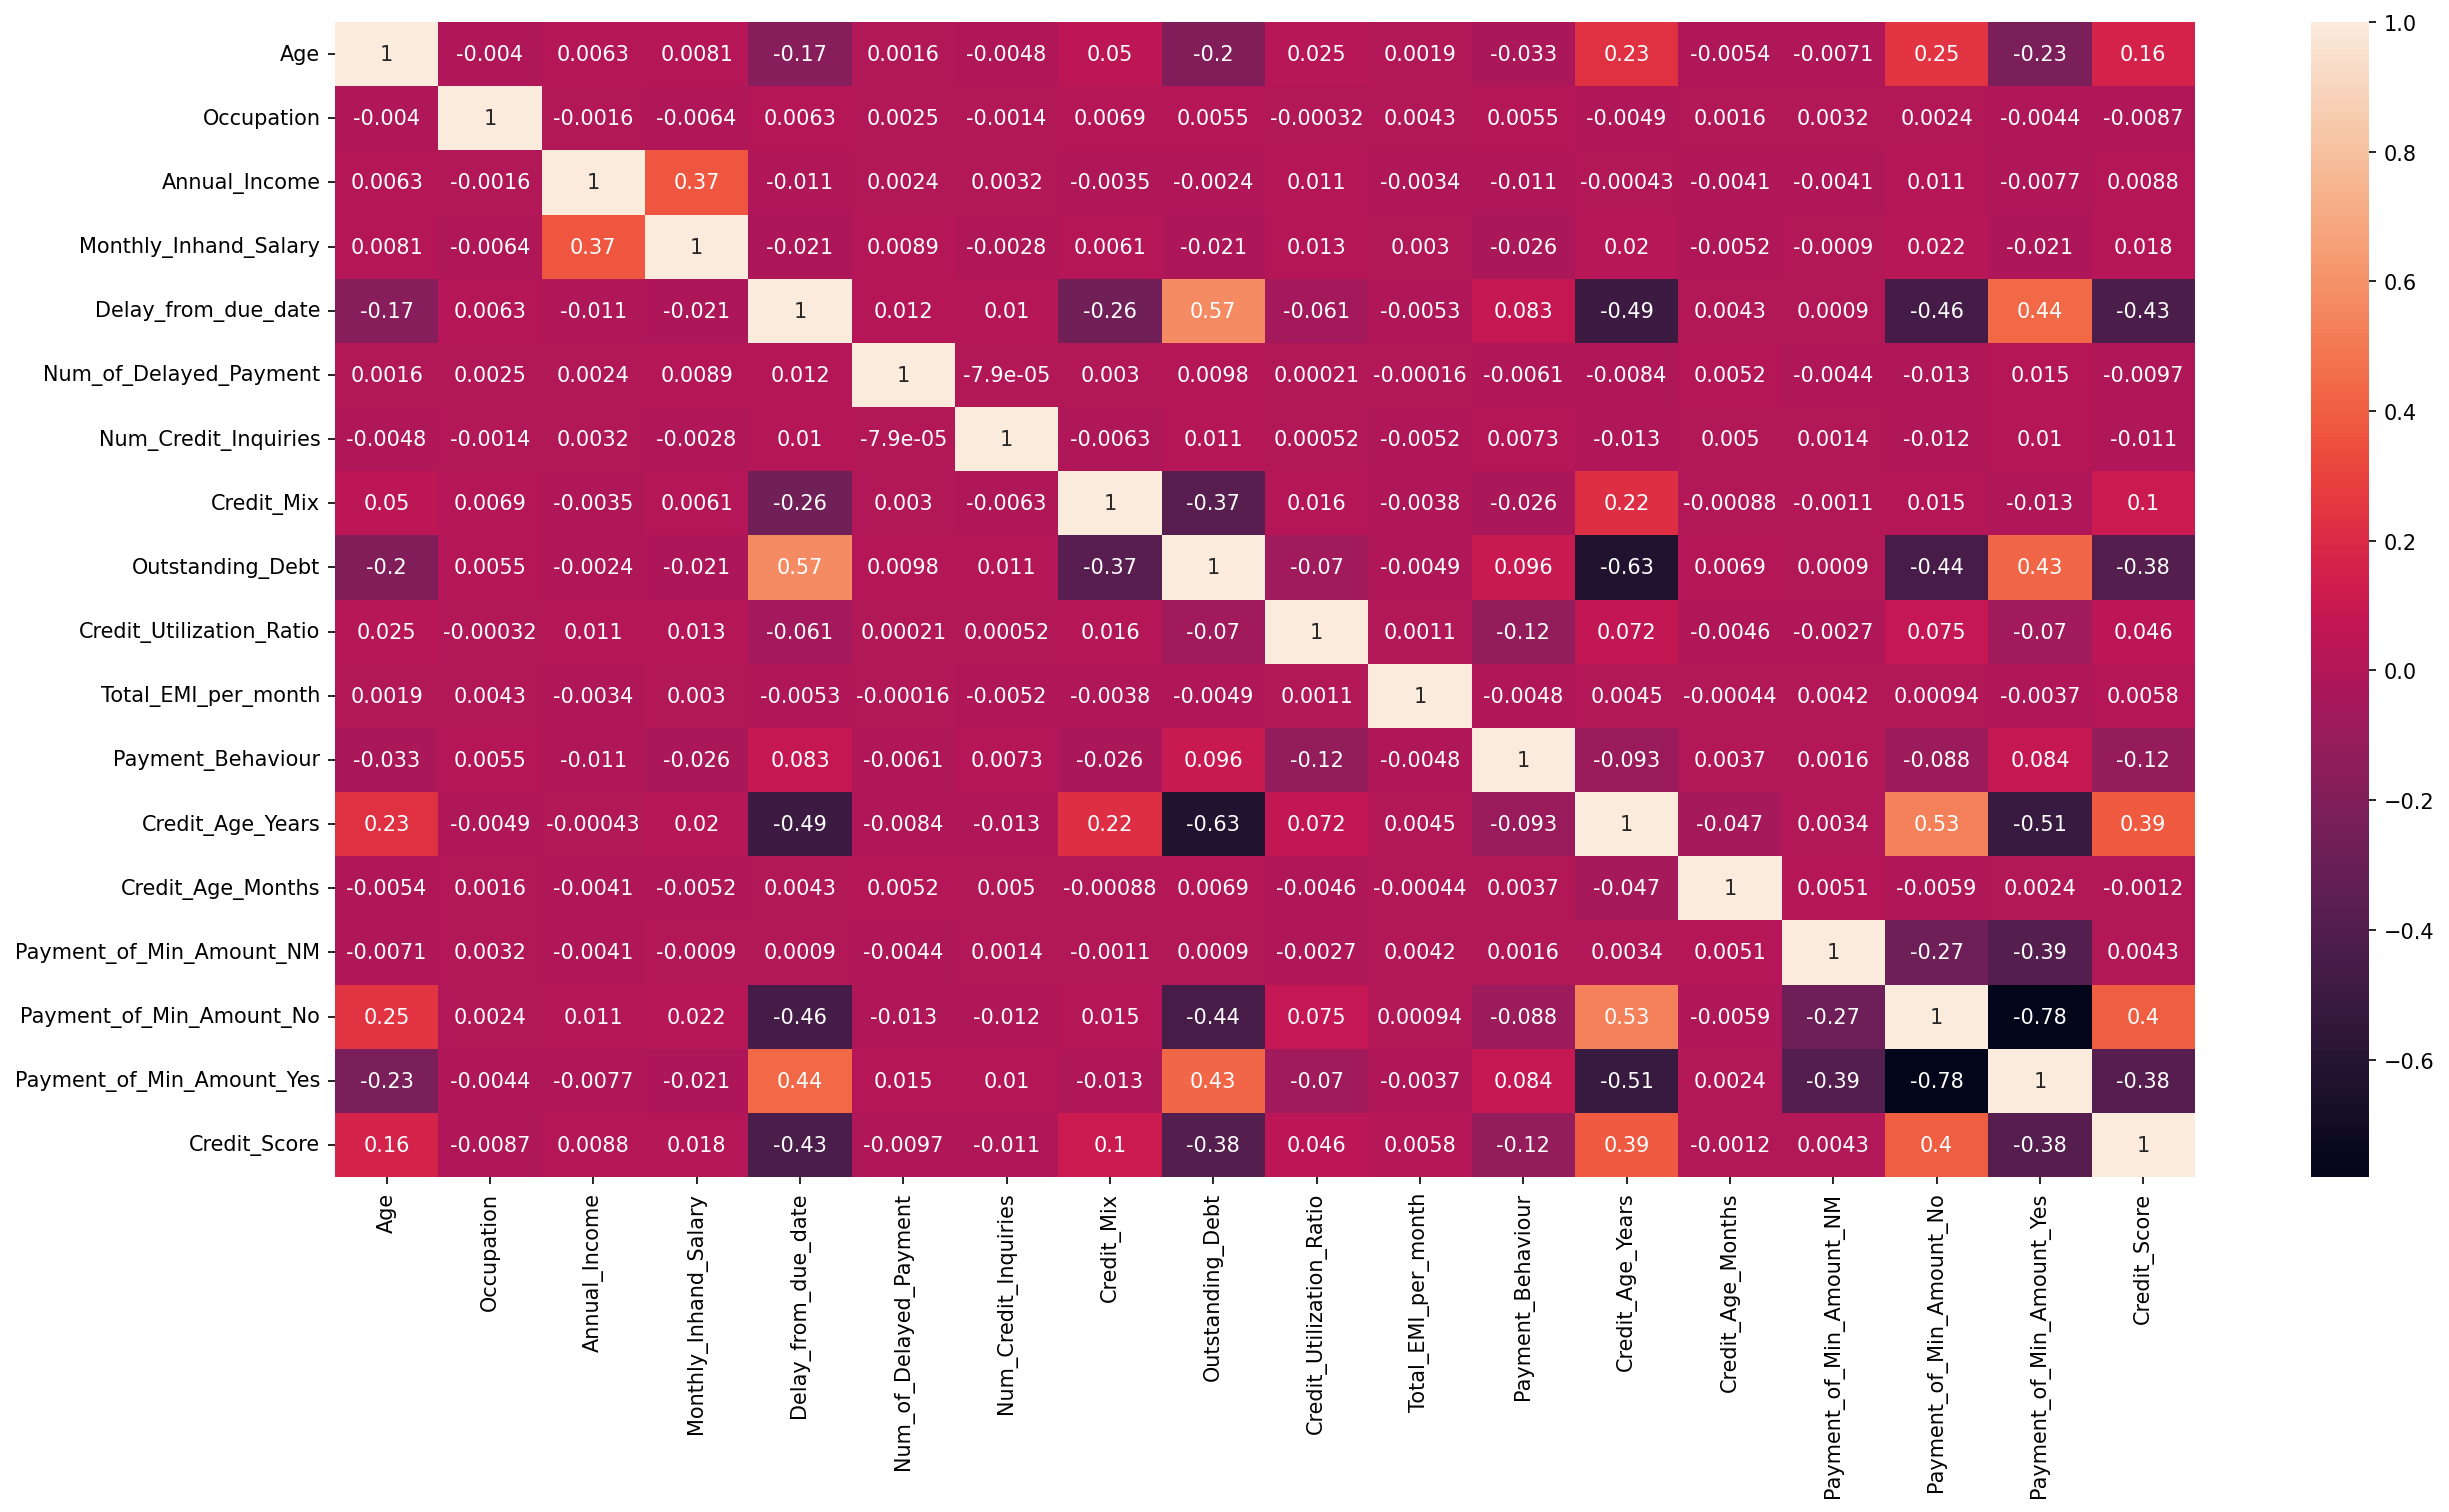

In [331]:
plt.figure(figsize=(20,10),dpi=150)
sns.heatmap(updated_df.corr(numeric_only=True),annot=True)

In [332]:
updated_df['Credit_Score'].value_counts()

Credit_Score
1    43223
0    23619
2    14416
Name: count, dtype: int64

In [333]:
# plt.figure(figsize=(30,10))
# sns.boxplot(updated_df)

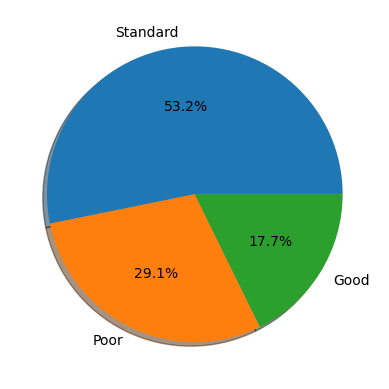

In [334]:
plt.pie(updated_df['Credit_Score'].value_counts(),labels=["Standard","Poor","Good"],autopct='%1.1f%%',shadow=True,radius=1)
plt.show()

In [335]:
updated_df['Annual_Income'].value_counts()

Annual_Income
40341.16       16
17816.75       15
9141.63        14
20867.67       14
95596.35       14
               ..
20648426.00     1
4274320.00      1
22640654.00     1
9416591.00      1
13301420.00     1
Name: count, Length: 13288, dtype: int64

In [336]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81258 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_ID                81258 non-null  object 
 1   Age                        81258 non-null  float64
 2   Occupation                 81258 non-null  int64  
 3   Annual_Income              81258 non-null  float64
 4   Monthly_Inhand_Salary      81258 non-null  float64
 5   Delay_from_due_date        81258 non-null  int64  
 6   Num_of_Delayed_Payment     81258 non-null  float64
 7   Num_Credit_Inquiries       81258 non-null  float64
 8   Credit_Mix                 81258 non-null  int64  
 9   Outstanding_Debt           81258 non-null  float64
 10  Credit_Utilization_Ratio   81258 non-null  float64
 11  Total_EMI_per_month        81258 non-null  float64
 12  Payment_Behaviour          81258 non-null  int64  
 13  Monthly_Balance            81258 non-null  object 


In [337]:
updated_df.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Age_Years,Credit_Age_Months,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Score
0,CUS_0xd40,23.0,12,19114.12,1824.843333,3,7.0,4.0,3,809.98,26.82,49.574949,2,312.49408867943663,22,1,False,True,False,2
3,CUS_0xd40,23.0,12,19114.12,1592.843333,5,4.0,4.0,1,809.98,31.38,49.574949,5,223.45130972736786,22,4,False,True,False,2
5,CUS_0xd40,23.0,12,19114.12,1592.843333,8,4.0,4.0,1,809.98,27.26,49.574949,1,340.4792117872438,22,6,False,True,False,2
6,CUS_0xd40,23.0,12,19114.12,1824.843333,3,8.0,4.0,1,809.98,22.54,49.574949,5,244.5653167062043,22,7,False,True,False,2
8,CUS_0x21b1,28.0,13,34847.84,3037.986667,3,4.0,2.0,1,605.03,24.46,18.816215,5,470.69062692529184,26,7,False,True,False,1


-------------
model building
-------------

In [338]:
updated_df.drop(['Customer_ID','Occupation','Credit_Age_Months','Monthly_Inhand_Salary','Monthly_Balance','Payment_Behaviour'],axis=1,inplace=True)


In [339]:
from pathlib import Path

filepath = Path('/home/sunbeam/main/codes/project/final.csv')

updated_df.to_csv(filepath)

In [340]:
x = updated_df.drop('Credit_Score',axis=1)
# x['Monthly_Balance'] = x['Monthly_Balance'].astype(float)
y = updated_df['Credit_Score']

In [341]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81258 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        81258 non-null  float64
 1   Annual_Income              81258 non-null  float64
 2   Delay_from_due_date        81258 non-null  int64  
 3   Num_of_Delayed_Payment     81258 non-null  float64
 4   Num_Credit_Inquiries       81258 non-null  float64
 5   Credit_Mix                 81258 non-null  int64  
 6   Outstanding_Debt           81258 non-null  float64
 7   Credit_Utilization_Ratio   81258 non-null  float64
 8   Total_EMI_per_month        81258 non-null  float64
 9   Credit_Age_Years           81258 non-null  Int64  
 10  Payment_of_Min_Amount_NM   81258 non-null  bool   
 11  Payment_of_Min_Amount_No   81258 non-null  bool   
 12  Payment_of_Min_Amount_Yes  81258 non-null  bool   
dtypes: Int64(1), bool(3), float64(7), int64(2)
memory u

In [342]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

toscale=["Age",	"Annual_Income","Delay_from_due_date","Num_of_Delayed_Payment",	"Num_Credit_Inquiries",	"Credit_Mix","Outstanding_Debt","Total_EMI_per_month" ,"Credit_Utilization_Ratio"	,"Credit_Age_Years"]

In [343]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), toscale)
    ],
    remainder='passthrough' 
)

# Create a pipeline with the preprocessor
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the data
xs = pipeline.fit_transform(x)
joblib.dump(pipeline, 'model_transformed.pkl')

['model_transformed.pkl']

In [344]:
x = pd.DataFrame(xs, columns=x.columns)
x.describe()


,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Credit_Age_Years,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
count,8.125800e+04,8.125800e+04,8.125800e+04,8.125800e+04,8.125800e+04,8.125800e+04,8.125800e+04,8.125800e+04,8.125800e+04,8.125800e+04,81258.000000,81258.000000,81258.000000
mean,1.483030e-16,-1.088663e-17,4.004880e-17,6.995424e-19,9.618708e-19,-5.421454e-17,-2.903101e-17,1.311642e-17,-1.144583e-15,1.622938e-16,0.119434,0.357368,0.523198
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,0.324301,0.479227,0.499465
min,-1.792229e+00,-1.176806e-01,-1.753672e+00,-1.502254e-01,-1.418982e-01,-1.563245e+00,-1.234690e+00,-1.694424e-01,-2.239970e+00,-2.165845e+00,0.000000,0.000000,0.000000
25%,-8.642433e-01,-1.090471e-01,-7.438524e-01,-9.679614e-02,-1.259251e-01,-5.753142e-01,-7.436862e-01,-1.658245e-01,-8.268113e-01,-7.220145e-01,0.000000,0.000000,0.000000
50%,-2.905650e-02,-9.675082e-02,-2.052820e-01,-7.453396e-02,-1.152763e-01,4.126165e-01,-2.252279e-01,-1.612236e-01,6.213859e-03,-9.920730e-05,0.000000,0.000000,1.000000
75%,8.061303e-01,-7.212773e-02,4.679310e-01,-5.672421e-02,-9.397878e-02,4.126165e-01,4.498377e-01,-1.506188e-01,8.221188e-01,8.421352e-01,0.000000,1.000000,1.000000
max,2.105310e+00,1.676644e+01,3.093462e+00,1.944050e+01,1.366954e+01,1.400547e+00,3.102071e+00,9.728173e+00,3.457668e+00,1.804689e+00,1.000000,1.000000,1.000000


In [345]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=100)

In [346]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65006 entries, 72271 to 38408
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        65006 non-null  float64
 1   Annual_Income              65006 non-null  float64
 2   Delay_from_due_date        65006 non-null  float64
 3   Num_of_Delayed_Payment     65006 non-null  float64
 4   Num_Credit_Inquiries       65006 non-null  float64
 5   Credit_Mix                 65006 non-null  float64
 6   Outstanding_Debt           65006 non-null  float64
 7   Credit_Utilization_Ratio   65006 non-null  float64
 8   Total_EMI_per_month        65006 non-null  float64
 9   Credit_Age_Years           65006 non-null  float64
 10  Payment_of_Min_Amount_NM   65006 non-null  float64
 11  Payment_of_Min_Amount_No   65006 non-null  float64
 12  Payment_of_Min_Amount_Yes  65006 non-null  float64
dtypes: float64(13)
memory usage: 6.9 MB


In [347]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=7)
x_train_sm,y_train_sm=smote.fit_resample(x_train,y_train)


In [348]:
d_final = pd.DataFrame(x_train_sm,columns=x_train.columns)
d_final['target'] = y_train_sm
d_final['target']

0         1
1         0
2         1
3         0
4         1
         ..
103705    2
103706    2
103707    2
103708    2
103709    2
Name: target, Length: 103710, dtype: int64

In [349]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

def create_model_logistic_regression():
    model = LogisticRegression(max_iter=2000,solver='lbfgs')
    
    model.fit(x_train,y_train)
    
    return model

In [350]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

def create_model_naive_bayes():
    model = GaussianNB()
    
    model.fit(x_train,y_train)
    
    return model

In [351]:
# knn
from sklearn.neighbors import KNeighborsClassifier

def create_model_knn():
    model = KNeighborsClassifier(n_neighbors=3)
    
    model.fit(x_train,y_train)
    
    return model

In [352]:
# SVM
from sklearn.svm import SVC
def create_model_svm():
    model = SVC()
    
    model.fit(x_train,y_train)
    
    return model

In [353]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

def create_model_ds():
    model = DecisionTreeClassifier(max_depth=500)
    
    model.fit(x_train,y_train)
    
    return model

In [354]:
# random forest
from sklearn.ensemble import RandomForestClassifier

def create_model_random_forst():
    model = RandomForestClassifier(n_estimators=100)
    
    model.fit(x_train,y_train)
    
    return model

In [355]:
# CAT Boost
from catboost import CatBoostClassifier
def create_model_catboost():
    model = CatBoostClassifier(logging_level="Silent")
    model.fit(x_train, y_train)
    return model

In [356]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

def create_model_ada_boost():
    model = AdaBoostClassifier()
    model.fit(x_train, y_train)
    return model

In [357]:
#### GradientBoost

from sklearn.ensemble import GradientBoostingClassifier

def create_model_grandient_boost():
    model = GradientBoostingClassifier()
    model.fit(x_train, y_train)
    return model

In [358]:
from xgboost import XGBClassifier

def create_model_xgboost():
    model = XGBClassifier()
    model.fit(x_train, y_train)
    return model

In [359]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

def evaluate_model(model):
    # training accuracy
    y_pred = model.predict(x_train)
    y_true = y_train
    
    training_accuracy = accuracy_score(y_true,y_pred)
    
    # overfitting -> which have training accuracy > testing accuracy
    
    # testing accuracy
    y_pred = model.predict(x_test)
    y_true = y_test
    
    # get the performance metrics for testing
    testing_accuracy = accuracy_score(y_true, y_pred)
    testing_precision = precision_score(y_true, y_pred,average='macro')
    testing_recall = recall_score(y_true, y_pred,average='macro')
    testing_f1 = f1_score(y_true, y_pred,average='macro')
    # testing_roc = roc_auc_score(y_true, y_pred,average='macro',multi_class='ovr')

    return training_accuracy, testing_accuracy, testing_precision, testing_f1, testing_recall

In [360]:
models = [
    ("Logistic Regression",create_model_logistic_regression(),(0,0)),
    ("Naive Bayes",create_model_naive_bayes(),(0,1)),
    ("KNN",create_model_knn(),(1,0)),
    ("SVM",create_model_svm(),(1,1)),
    ("Decision Tree",create_model_ds(),(2,0)),
    ("Random Forest",create_model_random_forst(),(2,1)),
    ("CAT Boost",create_model_catboost(),(3,0)),
    ("Ada Boost",create_model_ada_boost(),(3,1)),
    ("Gradient Boost",create_model_grandient_boost(),(4,0)),
    ("XG Boost",create_model_xgboost(),(4,1)),
]

/home/sunbeam/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [361]:
performance_data = []

for model_name,model,position in models:
    training_accuracy, testing_accuracy, testing_precision, testing_f1, testing_recall = evaluate_model(model)
    performance_data.append([
        model_name, f"{training_accuracy}", f"{testing_accuracy}", testing_precision, testing_recall, testing_f1
    ])

In [362]:
performance_chart = pd.DataFrame(performance_data, 
            columns=["Model", "Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1"])
performance_chart

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,0.5877149801556779,0.5856509968003938,0.565791,0.509999,0.524904
1,Naive Bayes,0.5651478325077686,0.5566084174255477,0.571828,0.629725,0.558162
2,KNN,0.7882810817463003,0.6133398966281073,0.582047,0.579051,0.579615
3,SVM,0.6535089068701351,0.6481048486340143,0.620238,0.641954,0.627208
4,Decision Tree,0.9999538504138079,0.6893920748215604,0.665860,0.670192,0.667929
5,Random Forest,0.9999230840230132,0.7671671178931824,0.749600,0.753635,0.751577
6,CAT Boost,0.7778358920715011,0.7241570268274674,0.698815,0.717240,0.706552
7,Ada Boost,0.6384487585761315,0.6402288949052425,0.616244,0.617550,0.614804
8,Gradient Boost,0.6828138941020829,0.6719173024858479,0.647711,0.671496,0.654344
9,XG Boost,0.8061102052118266,0.7370785134137336,0.714192,0.729936,0.721246


In [363]:
from sklearn.model_selection import GridSearchCV

In [364]:
# from sklearn import svm
# def svc_param_selection(x, y, nfolds):
#     Cs = [0.001, 0.01, 0.1, 1, 10]
#     gammas = [0.001, 0.01, 0.1, 1]
#     param_grid = {'C': Cs, 'gamma' : gammas}
#     grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
#     grid_search.fit(x, y)
#     grid_search.best_params_
#     return grid_search.best_params_

In [365]:
# print(svc_param_selection(x,y,5))

In [366]:
from catboost import CatBoostClassifier
import numpy as np

def catboost_param_selection(X, y, nfolds):
    # Define hyperparameter space for Grid Search
    param_grid = {
        'iterations': [50, 100, 200],  # Number of trees
        'learning_rate': [0.01, 0.1, 0.5],  # Learning rate
        'depth': [4, 6, 8],  # Depth of the tree
        'l2_leaf_reg': [0.1, 1, 5],  # L2 regularization
        'border_count': [32, 64, 128],  # Number of borders for numerical features
        'random_state': [42]  # For reproducibility
    }
    
    # Initialize CatBoost Classifier
    catboost_model = CatBoostClassifier(task_type='CPU',  # 'GPU' if available and preferred
                                         verbose=100  # Logging frequency
                                        )
    
    # Initialize Grid Search with Cross Validation
    grid_search = GridSearchCV(estimator=catboost_model, 
                               param_grid=param_grid, 
                               cv=nfolds, 
                               verbose=2,  # GridSearch verbosity
                               n_jobs=-1  # Use all available CPU cores
                              )
    
    # Perform Grid Search
    grid_search.fit(x, y)
    
    # Return the best parameters and the corresponding best score
    return grid_search.best_params_, grid_search.best_score_


catboost_param_selection()

TypeError: catboost_param_selection() missing 3 required positional arguments: 'X', 'y', and 'nfolds'